<a href="https://colab.research.google.com/github/acastiblancol/Entregas4101/blob/main/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency

In [ ]:
# Cargar el data set en Listings_df
listings_df = pd.read_csv("./data/listings.csv.gz")

In [ ]:
# Elimina el valor "$" de la columna price para poder hacer calculos más adelante

listings_df["price"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [ ]:
# Listar los primeros campos para entender la data
print(listings_df.head(5))

      id                         listing_url       scrape_id last_scraped  \
0   3176   https://www.airbnb.com/rooms/3176  20240622134424   2024-06-23   
1   9991   https://www.airbnb.com/rooms/9991  20240622134424   2024-06-23   
2  14325  https://www.airbnb.com/rooms/14325  20240622134424   2024-06-22   
3  16644  https://www.airbnb.com/rooms/16644  20240622134424   2024-06-23   
4  17904  https://www.airbnb.com/rooms/17904  20240622134424   2024-06-23   

        source                                           name  \
0  city scrape                Fabulous Flat in great Location   
1  city scrape            Geourgeous flat - outstanding views   
2  city scrape            Studio Apartment in Prenzlauer Berg   
3  city scrape             In the Heart of Berlin - Kreuzberg   
4  city scrape  Beautiful Kreuzberg studio - 3 months minimum   

                                         description  \
0  This beautiful first floor apartment  is situa...   
1  4 bedroom with very large windo

Posterior a la validación de los archivos se seleccionan los siguientes 5 criterios:
1. Valores de arriendo
2. Ocupacion
3. Tamaño Número de personas que se pueden hospedar
4. Valoración de la Ubicación
5. Valoración de lo Porpiedad

In [ ]:
# Se Crea un dataset nuevo con los siguientes columnas id, name, description, host_id, latitude, longitude, property_type, room_type, accomodates, price, availability_365, review_scores_location, review_scores_value

new_listings_df = listings_df[['id', 'name', 'description', 'host_id', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'price', 'availability_365', 'review_scores_location', 'review_scores_value']]
new_listings_df.to_csv('new_listings.csv', index=False)
new_listings_df.sample(5)



,id,name,description,host_id,latitude,longitude,property_type,room_type,accommodates,price,availability_365,review_scores_location,review_scores_value
1403,6938218,Cosy / stylish / unique apartment!,Cosy and stylish apartment near Neukölln and K...,1989616,52.489270,13.443420,Entire rental unit,Entire home/apt,2,NaN,0,4.93,4.93
8155,52595882,"Central, spacious, peaceful Charlottenburg alt...","Spacious, high-ceilinged apartment on the firs...",626079,52.523710,13.314450,Private room in rental unit,Private room,2,105.0,83,4.78,4.56
10130,821061516831722876,"Sunny & spacious, 140m² w garden","Sunny, spacious, modern 4-bedroom apartment (1...",7093139,52.477426,13.437917,Entire rental unit,Entire home/apt,5,199.0,178,4.60,4.80
8992,650679901832491731,Very Cozy Apartment in the Heart of Berlin,"The Apartment is fully equipped, cozy and brig...",76949354,52.516570,13.438970,Entire rental unit,Entire home/apt,2,44.0,319,NaN,NaN
1617,7834240,"Balkonstudio, lichthell&zentral","Light bright studio, 35 sqm, very central in B...",31164793,52.494370,13.356500,Entire rental unit,Entire home/apt,1,NaN,0,5.00,4.50


In [ ]:
# Se crea un nuevo data set a partir de new_listings ordenando por la columan price de mayor a menor

topprice_listings_df = new_listings_df.sort_values('price', ascending=False)
topprice_listings_df.to_csv('topprice_listings.csv', index=False)
topprice_listings_df.head()


,id,name,description,host_id,latitude,longitude,property_type,room_type,accommodates,price,availability_365,review_scores_location,review_scores_value
5343,31278404,RomanticStyle Apartment Berlin near Alexanderp...,The romantic-style apartment is located in the...,2569632,52.51541,13.42041,Entire rental unit,Entire home/apt,6,24277.0,194,4.83,4.5
1610,7807397,New York style cosy loft in Berlin,Spacious studio apartment in the heart of Schö...,16101198,52.48700,13.36565,Entire rental unit,Entire home/apt,2,3429.0,358,4.40,4.8
6446,39877586,City Loft 300m zum KADEWE für Film -Fotoaufna...,"for film, photo shoots, business events and re...",307093950,52.49805,13.34874,Entire loft,Entire home/apt,1,3000.0,89,NaN,NaN
682,2860420,250 qm penthouse with roof terrace for photoshoot,"For rent for photoshoots, during week days, f...",14623546,52.49185,13.41961,Entire loft,Entire home/apt,15,2500.0,90,4.87,4.6
8977,648389751444769673,Alte Schönhauser Penthouse,"Centrally located in Mitte, the penthouse is a...",102979040,52.52544,13.40652,Private room in rental unit,Private room,6,2204.0,152,5.00,5.0


In [ ]:
# Eliminar todas las registros que tienen como tipo de habitacion un cuarto de hotel

topprice_listings_df = topprice_listings_df.loc[listings_df["room_type"] != "Hotel room"]

# Eliminar todas las registros que tienen tipo de propiedad una habitacion en hotel

topprice_listings_df = topprice_listings_df.loc[listings_df["property_type"] != "Room in hotel"]

# Lista el top del nuevo dataset

topprice_listings_df.head()

,id,name,description,host_id,latitude,longitude,property_type,room_type,accommodates,price,availability_365,review_scores_location,review_scores_value
5343,31278404,RomanticStyle Apartment Berlin near Alexanderp...,The romantic-style apartment is located in the...,2569632,52.51541,13.42041,Entire rental unit,Entire home/apt,6,24277.0,194,4.83,4.5
1610,7807397,New York style cosy loft in Berlin,Spacious studio apartment in the heart of Schö...,16101198,52.48700,13.36565,Entire rental unit,Entire home/apt,2,3429.0,358,4.40,4.8
6446,39877586,City Loft 300m zum KADEWE für Film -Fotoaufna...,"for film, photo shoots, business events and re...",307093950,52.49805,13.34874,Entire loft,Entire home/apt,1,3000.0,89,NaN,NaN
682,2860420,250 qm penthouse with roof terrace for photoshoot,"For rent for photoshoots, during week days, f...",14623546,52.49185,13.41961,Entire loft,Entire home/apt,15,2500.0,90,4.87,4.6
8977,648389751444769673,Alte Schönhauser Penthouse,"Centrally located in Mitte, the penthouse is a...",102979040,52.52544,13.40652,Private room in rental unit,Private room,6,2204.0,152,5.00,5.0


In [ ]:
# Caluclo de rango Intercuartilico IQR
q1 = topprice_listings_df["price"].quantile(0.25)
q3 = topprice_listings_df["price"].quantile(0.75)
iqr = q3 - q1

# Eliminar los valores atipicos del dataset

topprice_listings_df = topprice_listings_df.loc[topprice_listings_df["price"] <= (q3 + 1.5 * iqr)]
topprice_listings_df.head()
print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")

Q1: 72.0, Q3: 183.0, IQR: 111.0


In [ ]:
# Generar el listado de las 100 propiedades con mejor renta del data set

listings_df_top100 = topprice_listings_df.head(100)
listings_df_top100.to_csv('listings_top100.csv', index=False)

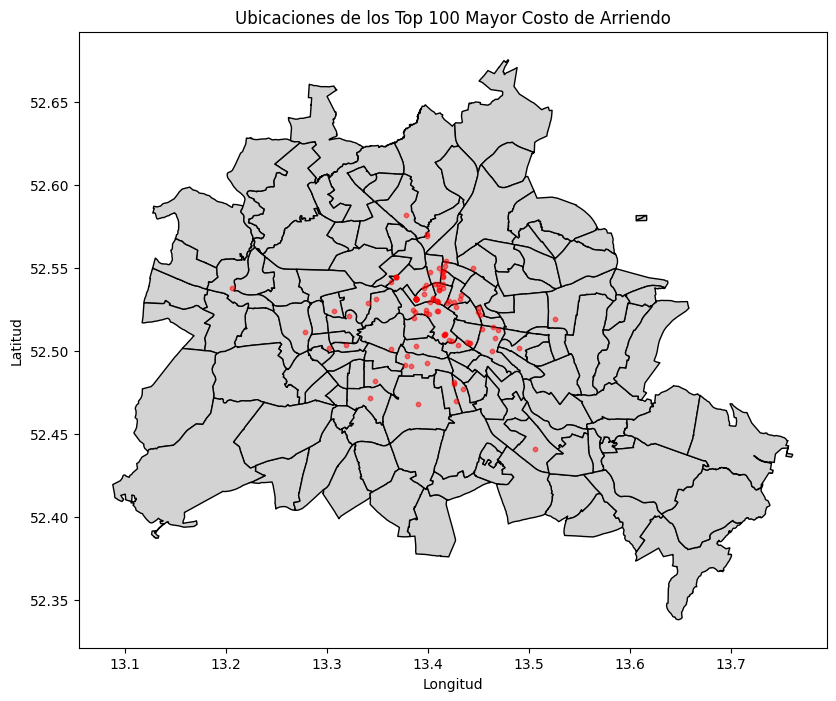

In [ ]:
# prompt: graficar el archivo de top300 latitud y longitud junto con el archivo geojson

import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el archivo GeoJSON
geo_df = gpd.read_file("./data/neighbourhoods.geojson")

# Crear un gráfico con la ubicación de los top 300 listados
fig, ax = plt.subplots(figsize=(12, 8))
geo_df.plot(ax=ax, color='lightgray', edgecolor='black')
plt.scatter(listings_df_top100['longitude'], listings_df_top100['latitude'], s=10, c='red', alpha=0.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicaciones de los Top 100 Mayor Costo de Arriendo')
plt.show()

In [ ]:
# Se genera un nuevo dataset  tomando como referencia el data set listings_df_top100 con la columna availability_365 de menor a mayor el nombre del dataset nuevo es topoccupation_listings_df

topoccupation_listings_df = listings_df_top100.sort_values('availability_365', ascending=True)
topoccupation_listings_df.to_csv('topoccupation_listings.csv', index=False)
topoccupation_listings_df.head()


,id,name,description,host_id,latitude,longitude,property_type,room_type,accommodates,price,availability_365,review_scores_location,review_scores_value
3095,16627622,LUXX - in the heart of Mitte,"Our place is close to Alexanderplatz, Hackesch...",109813917,52.52438,13.40921,Entire rental unit,Entire home/apt,4,329.0,6,4.96,4.71
1879,9267723,Classic Berlin Style At The Park,"Our classic, old-Berlin Style apartment is in ...",8146714,52.56907,13.39956,Entire rental unit,Entire home/apt,5,330.0,9,4.92,4.70
11919,1020084718005687033,Spacious 3 bedrooms & terrace,This spacious 4-room apartment is located in t...,27258576,52.57043,13.39935,Entire rental unit,Entire home/apt,6,330.0,13,NaN,NaN
4577,25975492,Amazing 3 floor penthouse in the heart of Berlin,"Our large penthouse is spread over 3 floors, w...",4002880,52.50612,13.42448,Entire condo,Entire home/apt,7,330.0,14,4.89,4.77
4650,26467675,Luxurious Family Apartment Near Berlin Wall 110m2,"Experience urban elegance in our bright, spaci...",19374682,52.53966,13.39878,Entire rental unit,Entire home/apt,5,330.0,25,4.90,4.70


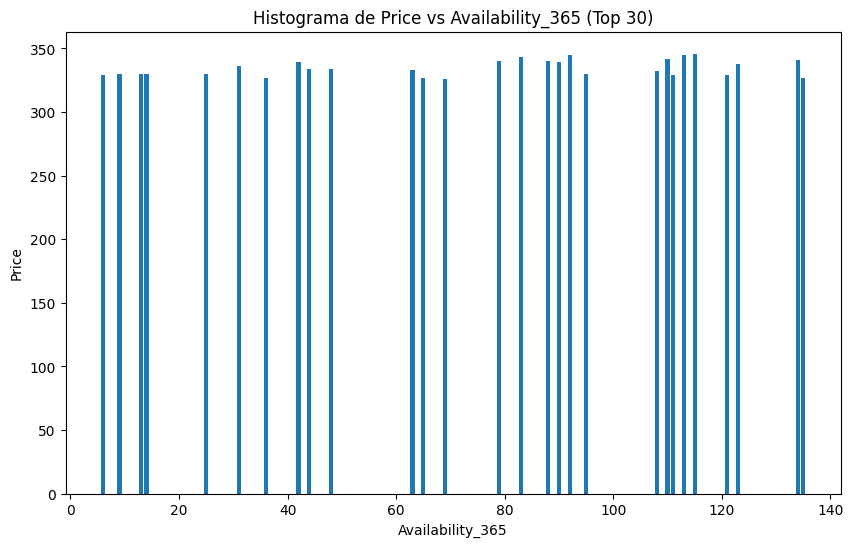

In [ ]:
# prompt: generar un histograma con donde el eje X sea availability_365 y el eje Y la columna price para los primero 30 registros del data set topoccupation_listings_df

plt.figure(figsize=(10, 6))
plt.bar(topoccupation_listings_df['availability_365'].head(30), topoccupation_listings_df['price'].head(30))
plt.xlabel('Availability_365')
plt.ylabel('Price')
plt.title('Histograma de Price vs Availability_365 (Top 30)')
plt.show()


In [ ]:
# prompt: generar un nuevo dataset con los primero 30 registros del dataset topoccupation_listings_df guardarlso econ el tombre top30ocp_listings_df

top30ocp_listings_df = topoccupation_listings_df.head(30)
top30ocp_listings_df.to_csv('top30ocp_listings.csv', index=False)
top30ocp_listings_df.sample(30)

,id,name,description,host_id,latitude,longitude,property_type,room_type,accommodates,price,availability_365,review_scores_location,review_scores_value
2648,13651040,Central flat near Alex with fiber optic Internet,This light and clean apartment is located in a...,79255369,52.510240,13.416840,Entire serviced apartment,Entire home/apt,6,341.0,134,4.78,4.80
6268,38592727,Villa Winckelmann in Köpenick,Forget shared bedrooms and shared toilets!<br ...,290064107,52.441290,13.505741,Entire rental unit,Entire home/apt,8,343.0,83,NaN,NaN
11919,1020084718005687033,Spacious 3 bedrooms & terrace,This spacious 4-room apartment is located in t...,27258576,52.570430,13.399350,Entire rental unit,Entire home/apt,6,330.0,13,NaN,NaN
4650,26467675,Luxurious Family Apartment Near Berlin Wall 110m2,"Experience urban elegance in our bright, spaci...",19374682,52.539660,13.398780,Entire rental unit,Entire home/apt,5,330.0,25,4.90,4.70
7993,51448534,Spectacular penthouse with a terrace,Unique and quiet . You have found the perfect ...,1122141,52.513250,13.454110,Entire condo,Entire home/apt,3,334.0,48,4.91,4.82
9844,774758426133303490,Group Apartment with 2 kitchens,140 m2 with 2 full equipped kitchen (!) apartm...,10817284,52.501110,13.363810,Entire rental unit,Entire home/apt,14,336.0,31,4.78,4.61
5161,30010293,BIG 3ROOMS City Center Apt. MITTE Alexanderplatz,EARLY BIRD DISCOUNT SEASON 2024 Family apartme...,167881332,52.522090,13.401550,Entire rental unit,Entire home/apt,7,340.0,88,4.86,4.38
3095,16627622,LUXX - in the heart of Mitte,"Our place is close to Alexanderplatz, Hackesch...",109813917,52.524380,13.409210,Entire rental unit,Entire home/apt,4,329.0,6,4.96,4.71
9521,721454755998812020,160sqm-Apartment in Prenzlauer Berg,Juuten Tach (Hello in Berlin-Slang)!<br />You ...,272304318,52.537840,13.414990,Entire rental unit,Entire home/apt,4,346.0,115,4.98,4.89
4577,25975492,Amazing 3 floor penthouse in the heart of Berlin,"Our large penthouse is spread over 3 floors, w...",4002880,52.506120,13.424480,Entire condo,Entire home/apt,7,330.0,14,4.89,4.77


In [ ]:
# prompt: tomar del dataset topprice_listings_df y generar un nuevo dataset con ocupation ordenando de menor a mayor por la columna availability_365

# Crear un nuevo dataset a partir de topprice_listings_df ordenando por availability_365 de menor a mayor
occupation_listings_df = topprice_listings_df.sort_values('availability_365', ascending=True)

# Guardar el nuevo dataset en un archivo CSV (opcional)
occupation_listings_df.to_csv('occupation_listings.csv', index=False)

# Mostrar las primeras filas del nuevo dataset
occupation_listings_df.head()

# generar un dataset nuevo con los primeros 30 datos de ocupación

top30oocuppation_listings_df = occupation_listings_df.head(30)
top30oocuppation_listings_df.to_csv('occupatio_listings.csv', index=False)
#top30oocuppation_listings_df.sample(30)

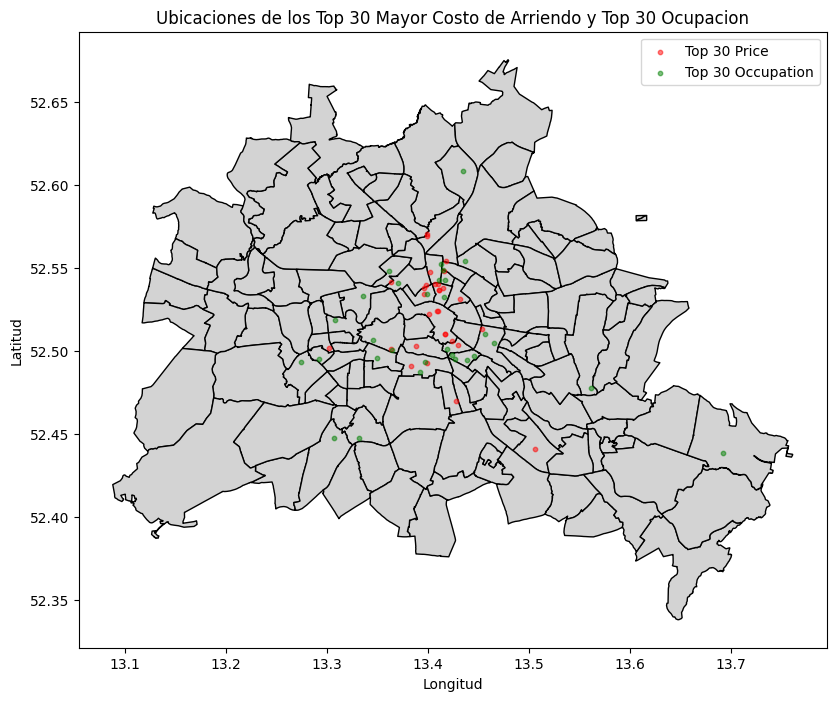

In [ ]:
# prompt: generar una grafica donde el dataset top30ocpu_listings_df este en rojo el data set top30occupation_listings_df en verde y graficar el archivo geojson

# Crear un gráfico con la ubicación de los top 30 listados de ocupación y precio
fig, ax = plt.subplots(figsize=(12, 8))
geo_df.plot(ax=ax, color='lightgray', edgecolor='black')
plt.scatter(top30ocp_listings_df['longitude'], top30ocp_listings_df['latitude'], s=10, c='red', alpha=0.5, label='Top 30 Price')
plt.scatter(top30oocuppation_listings_df['longitude'], top30oocuppation_listings_df['latitude'], s=10, c='green', alpha=0.5, label='Top 30 Occupation')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicaciones de los Top 30 Mayor Costo de Arriendo y Top 30 Ocupacion')
plt.legend()
plt.show()


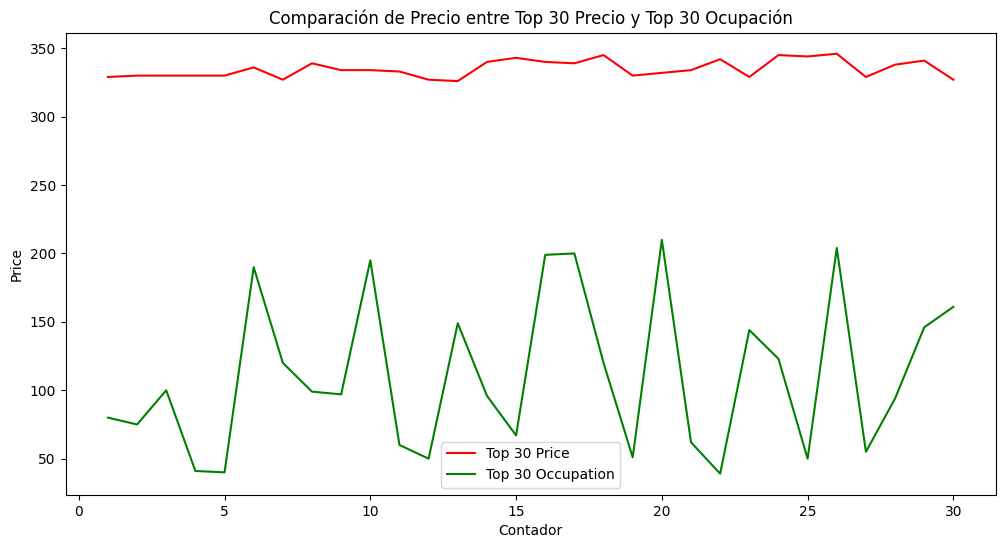

In [ ]:
# prompt: generar una grafica x y donde X sea un contador de 1 a 30 y el valor de y es la columna price en rojo para el dataset top30ocpu_listings_df  y en verde para el dataset top30occupation_listings_df

plt.figure(figsize=(12, 6))

# Graficar top30ocpu_listings_df en rojo
plt.plot(range(1, 31), top30ocp_listings_df['price'], color='red', label='Top 30 Price')

# Graficar top30occupation_listings_df en verde
plt.plot(range(1, 31), top30oocuppation_listings_df['price'], color='green', label='Top 30 Occupation')


plt.xlabel('Contador')
plt.ylabel('Price')
plt.title('Comparación de Precio entre Top 30 Precio y Top 30 Ocupación')
plt.legend()
plt.show()


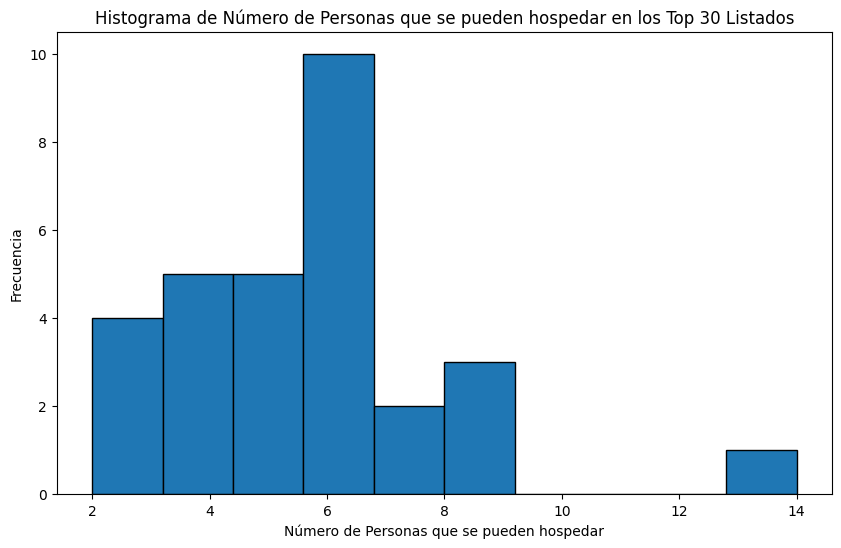

In [ ]:
# prompt: graficar del data set top30ocpu_listings_df un histograma con el campo accomodates

plt.figure(figsize=(10, 6))
plt.hist(top30ocp_listings_df['accommodates'], bins=10, edgecolor='black')
plt.xlabel('Número de Personas que se pueden hospedar')
plt.ylabel('Frecuencia')
plt.title('Histograma de Número de Personas que se pueden hospedar en los Top 30 Listados')
plt.show()


In [ ]:
# prompt: Geenrar un data set nuevo llamada personas filtando del data set top30ocpu_listings_df donde el campo accomodates sea igual a 4, 5 y 6

personas_df = top30ocp_listings_df[(top30ocp_listings_df['accommodates'] == 4) | (top30ocp_listings_df['accommodates'] == 5) | (top30ocp_listings_df['accommodates'] == 6)]
personas_df.to_csv('personas.csv', index=False)


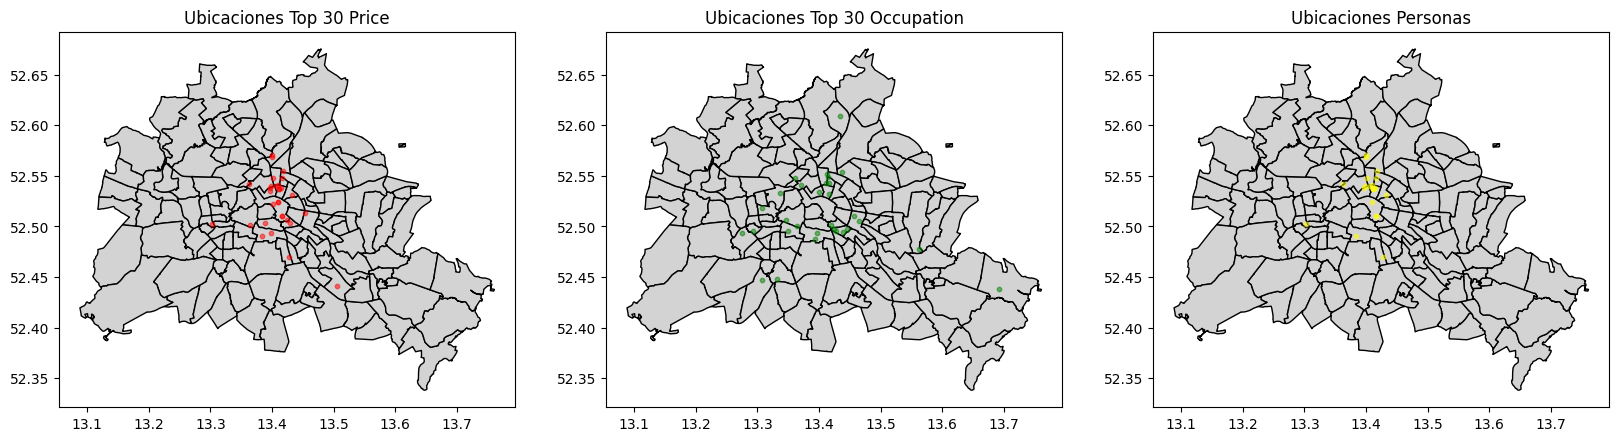

In [ ]:
# prompt: generar una grafica donde el dataset top30ocpu_listings_df este en rojo el data set top30occupation_listings_df en verde, dataset personas en amaillo y graficar el archivo geojson en 3 graficas diferentes para comparar

# Crear un gráfico con la ubicación de los top 30 listados de ocupación y precio
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Gráfico 1: Top 30 Price
axs[0].set_title('Ubicaciones Top 30 Price')
geo_df.plot(ax=axs[0], color='lightgray', edgecolor='black')
axs[0].scatter(top30ocp_listings_df['longitude'], top30ocp_listings_df['latitude'], s=10, c='red', alpha=0.5)

# Gráfico 2: Top 30 Occupation
axs[1].set_title('Ubicaciones Top 30 Occupation')
geo_df.plot(ax=axs[1], color='lightgray', edgecolor='black')
axs[1].scatter(top30oocuppation_listings_df['longitude'], top30oocuppation_listings_df['latitude'], s=10, c='green', alpha=0.5)

# Gráfico 3: Personas
axs[2].set_title('Ubicaciones Personas')
geo_df.plot(ax=axs[2], color='lightgray', edgecolor='black')
axs[2].scatter(personas_df['longitude'], personas_df['latitude'], s=10, c='yellow', alpha=0.5)

plt.show()


In [ ]:
# prompt: Generar un liatado en forma de trabla  del data set personas_df.to_csv donde se vean los siguientes columnas host_id, latitude, longitude,  room_type, accomodates, price, availability_365, review_scores_location, review_scores_value en nuevo data set que se llame calificacion

# Crear un nuevo DataFrame con las columnas especificadas
calificacion_df = personas_df[['host_id', 'latitude', 'longitude', 'room_type', 'accommodates', 'price', 'availability_365', 'review_scores_location', 'review_scores_value']]

# Mostrar el DataFrame en forma de tabla
print(calificacion_df)

# Guardar el nuevo DataFrame en un archivo CSV (opcional)
calificacion_df.to_csv('calificacion.csv', index=False)


         host_id   latitude  longitude        room_type  accommodates  price  \
3095   109813917  52.524380  13.409210  Entire home/apt             4  329.0   
1879     8146714  52.569070  13.399560  Entire home/apt             5  330.0   
11919   27258576  52.570430  13.399350  Entire home/apt             6  330.0   
4650    19374682  52.539660  13.398780  Entire home/apt             5  330.0   
6911      151200  52.540450  13.406940  Entire home/apt             4  327.0   
13288    6457465  52.469684  13.427481  Entire home/apt             6  339.0   
10295  276473149  52.554368  13.418397  Entire home/apt             6  326.0   
8515     6077213  52.490970  13.383630  Entire home/apt             6  340.0   
11075  399185860  52.501995  13.302367  Entire home/apt             5  339.0   
414     22770349  52.548110  13.416550  Entire home/apt             6  345.0   
8890   132577525  52.547950  13.401880  Entire home/apt             6  330.0   
6398     3003519  52.536670  13.410900  

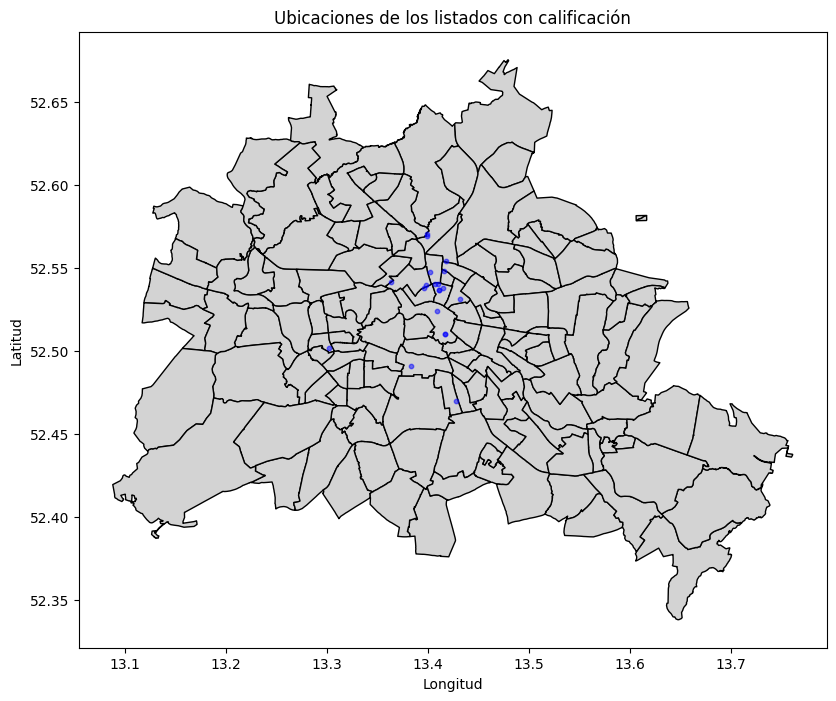

In [ ]:
# prompt: graficar el data set calificación junto al archivo geojson

# Crear un gráfico con la ubicación de los listados en calificacion_df
fig, ax = plt.subplots(figsize=(12, 8))
geo_df.plot(ax=ax, color='lightgray', edgecolor='black')
plt.scatter(calificacion_df['longitude'], calificacion_df['latitude'], s=10, c='blue', alpha=0.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicaciones de los listados con calificación')
plt.show()


In [ ]:
# prompt: crear un nuevo repocitorio a partir del data set topprice_listings_df donde se ordene por la columna  review_scores_value de mayor a menor el nuevo repositorio se calla Calpro

# Crear un nuevo DataFrame ordenando por review_scores_value de mayor a menor
Calpro = topprice_listings_df.sort_values('review_scores_value', ascending=False)

# Guardar el nuevo DataFrame en un archivo CSV (opcional)
Calpro.to_csv('Calpro.csv', index=False)

# Mostrar las primeras filas del nuevo DataFrame
Calpro.head()


,id,name,description,host_id,latitude,longitude,property_type,room_type,accommodates,price,availability_365,review_scores_location,review_scores_value
10291,842470172656334674,Friedrichshain-große Wohnung in super Lage,"In Berlin Friedrichshain, a fully equipped lar...",177712632,52.523852,13.449855,Entire rental unit,Entire home/apt,9,349.0,329,5.0,5.0
655,2644458,"Quiet, quaint, newly refurbished apartment",I am only 5 minutes from the tram station Hufe...,10004699,52.532340,13.429740,Entire rental unit,Entire home/apt,4,189.0,180,4.8,5.0
12474,1077426959212163647,Central and spacious room in Friedrichshain,The apartment is located in the heart of Berli...,13187956,52.507797,13.468595,Private room in rental unit,Private room,2,75.0,67,5.0,5.0
6939,42636037,Familienzimmer - Zimmer 5,On entering the building you will find a styli...,316043293,52.550301,13.417300,Private room in hostel,Private room,3,188.0,334,4.8,5.0
13235,1141392562342264608,Apartment in the city center,Avalable: 07.05-28.05<br /><br />The apartment...,573884779,52.501198,13.433111,Entire rental unit,Entire home/apt,4,75.0,78,5.0,5.0


In [ ]:
# prompt: generar un nuevo dataset con el top 50 de los datos de calpro nombrato top50calpro

# Generar el listado de las 50 propiedades con mejor valoración del data set Calpro
top50calpro = Calpro.head(50)
top50calpro.to_csv('top50calpro.csv', index=False)


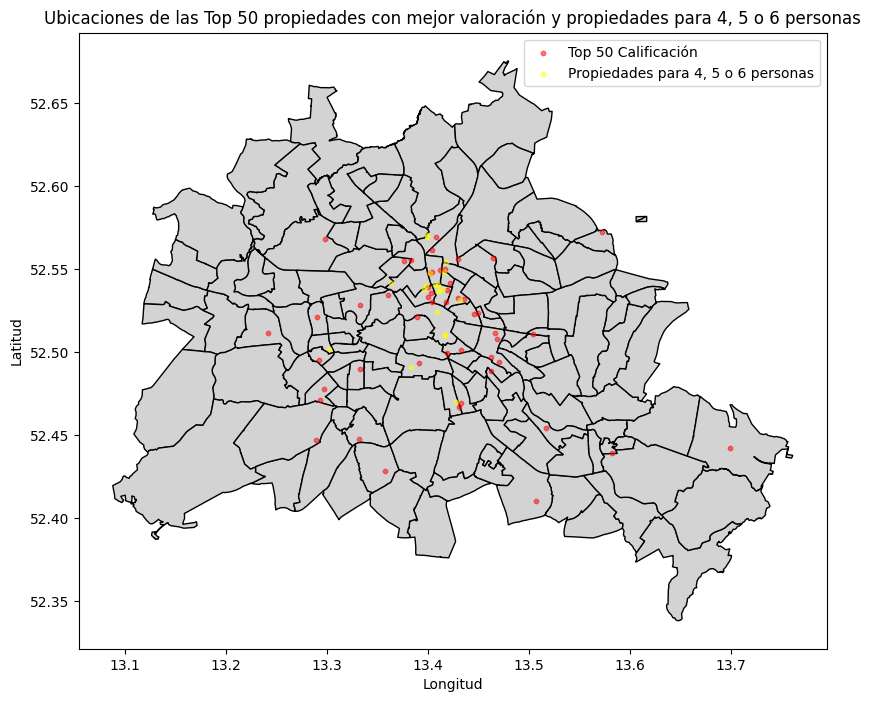

In [ ]:
# prompt: generar una grafica con los data sets top50calpro en rojo y personas en amaillo y graficar el archivo geojson

# Crear un gráfico con la ubicación de los top 50 propiedades con mejor valoración y las propiedades con 4, 5 o 6 personas
fig, ax = plt.subplots(figsize=(12, 8))
geo_df.plot(ax=ax, color='lightgray', edgecolor='black')
plt.scatter(top50calpro['longitude'], top50calpro['latitude'], s=10, c='red', alpha=0.5, label='Top 50 Calificación')
plt.scatter(personas_df['longitude'], personas_df['latitude'], s=10, c='yellow', alpha=0.5, label='Propiedades para 4, 5 o 6 personas')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicaciones de las Top 50 propiedades con mejor valoración y propiedades para 4, 5 o 6 personas')
plt.legend()
plt.show()
